# Use Case: AB Testing for Click Through Rate (CTR)

## Aims: 
<p align="center">
     This example for AB testing tries to determine whether or not a higher incidence of click through rates is observed in segments of
     the data based upon age. This information could then be used for data driven sales and marketing initiatives, to maximize ROI.
     The dataset is split into two groups of varying age ranges as well as four age group subsets to examine any CTR relationships as a function of age.
</p>

##### The data is incl. in this repo but is also available at https://www.kaggle.com/datasets/loveall/clicks-conversion-tracking

## Methodology. The How and the Why 
<p align="center">

In order to determine what appropriate questions might be asked, and consequently, what reasonable hypotheses 
might be tested from the data, some preliminary steps are needed. For example, whether or not the data displays a normal distribution 
will influence the choice of analytical methods. 

To obtain insight on the data, an initial inspection of the data is made. This helps identify any areas that might be of particular interest, lend 
beneficial insights, be potential areas of data cleaning (e.g. inconsistent labelling etc.).
Having inspected the dataset, the next step is to ensure the dataset we are working with is clean in order that any 
results obtained reflect the data accuately. 

First, the data should be clean, meaning any inconsistencies in value categories, null values (being empty, or being void of  assigned values) if any outliers in the data are present etc., are accounted for. Failing to execute this step will render any results inconclusive. 
Moreover, any missing data values or anomolies should be addressed if relevant to the analysis methods implemented. 

After these initial steps, the variables of interest need to be categorized broadly in order to determine appropriate statistical
analysis procedures. Initially the data can be viewed as being either categorical (qualitative - data which resists numerical classificcation)
or quantitative (either discrete, or continuous). Common examples of each type are  male/female and age respectively. 

Some basic statistical measures can be made to help gain insight on the datasets normality and any other salient features that 
might be of interest. 
This can be aided by some initial visualizations of the data (either subsets thereof or in its entirety) to 
potentially identify any trends or noteworthy observations. 

Having deteremined what variables are of interest and of what type they are, an hypothesis and null hypothesis
(the counter claim that would nullify or refute the hypothesis being presumed)
can be formed.  The null hypothesis effectively will aid in determining whether assumptions are,  
are not, statstically significant and can or can not be disregarded. 


Notes on specific tests and methods used: 

**General points of consideration:** 
The sample set is small. The data set is not normal in its distribution.
Both categorical and numerical values will be included in the test. 
Two distinct data group segmentations (age and gender) will be compared. 

**Hypothesis:** 
    Dataset segmentation based on age will 
    display a statistically significant result in the observed CTR's.
    
**Null Hypothesis:** 
   No difference in the CTR for different segments of the dataset 
   based on age will be observed. 

**Null Data Handling:** 
     Use of included libraries functionalities (e.g. Pandas, Numpy,Scipy etc., 
     and their underlying functions in C and Fortran programming languages)

**Missing Data:** 
    Imputation - replacement of missing data with substituted values in a test 
**Outlier Handling:**
    Winsorizing - limiting values at the extremes to reduce the effect of any outliers in the dataset

**Statistical Test-Choices:**
    Mann-Whitney U Test. - A random selection of values comparing a two-sample problem (even where 
                                     the distributions are non-normal) for small sample sizes.
    Kruskall-Wallis H Test.  - Tests whether or not a significant difference exists between two groups with non normal data set distributions
</p>

## Notes on specific tests and methods used: 


<p align="center">
General points of consideration: 
The sample set is small. The data set is not normal in its distribution.
Both categorical and numerical values will be included in the test. 
Two distinct data group segmentations (age and gender) will be compared. 

Hypothesis:
    Dataset segmentation based on age will 
    display a statistically significant result in the observed CTR's.
    
Null Hypothesis: 
   No difference in the CTR for different segments of the dataset 
   based on age will be observed. 

Null Data Handling:
     Use of included libraries functionalities (e.g. Pandas, Numpy,Scipy etc., 
     and their underlying functions in C and Fortran programming languages)

Missing Data: 
    Imputation - replacement of missing data with substituted values in a test 
Outlier Handling:
    Winsorizing - limiting values at the extremes to reduce the effect of any outliers in the dataset

Statistical Test-Choices:
    Mann-Whitney U Test. - A random selection of values comparing a two-sample problem (even where 
                                     the distributions are non-normal) for small sample sizes.
    Kruskall-Wallis H Test.  - Tests whether or not a significant difference exists between two groups with non normal data set distributions
</p>

### Definitions: 
<p align="center">
    Click through rate (CTR) is defined as (Clicks / Impressions)</p>
<p alignn="center">
    Conversion Rates can be most broadly defined as user interactions beyond CTRs and can include (but not limited to) requesting additional information,
    completing an online questionnaire, or even more specificially, sales resulting from CTRs (Total Sales / Total Visits). 
</P>

##### *Importing required libraries* 

In [8]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import math
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal 

In [9]:
df = pd.read_csv(r"C:\Users\S\Desktop\ab_dataImport\KAG_conversion_data.csv") 

### Initial inspection of the data with a limited number of rows

In [10]:
df.head(10)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1
5,708820,916,103929,30-34,M,29,1915,0,0.00,1,1
6,708889,916,103940,30-34,M,15,15615,3,4.77,1,0
7,708895,916,103941,30-34,M,16,10951,1,1.27,1,1
8,708953,916,103951,30-34,M,27,2355,1,1.50,1,0
9,708958,916,103952,30-34,M,28,9502,3,3.16,1,0


### Examining the overall dimensions of the dataset 

In [11]:
print(f"\nData Frame dimensions: {df.shape[0]} rows and {df.shape[1]} columns")


Data Frame dimensions: 1143 rows and 11 columns


### Looking at the overall dataset structure and data types contained in it

In [12]:
print(df.head())

    ad_id  xyz_campaign_id  fb_campaign_id    age gender  interest  \
0  708746              916          103916  30-34      M        15   
1  708749              916          103917  30-34      M        16   
2  708771              916          103920  30-34      M        20   
3  708815              916          103928  30-34      M        28   
4  708818              916          103928  30-34      M        28   

   Impressions  Clicks  Spent  Total_Conversion  Approved_Conversion  
0         7350       1   1.43                 2                    1  
1        17861       2   1.82                 2                    0  
2          693       0   0.00                 1                    0  
3         4259       1   1.25                 1                    0  
4         4133       1   1.29                 1                    1  


In [13]:
df.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

### Checking for Nulls in the dataset

In [14]:
df.isnull().any()

ad_id                  False
xyz_campaign_id        False
fb_campaign_id         False
age                    False
gender                 False
interest               False
Impressions            False
Clicks                 False
Spent                  False
Total_Conversion       False
Approved_Conversion    False
dtype: bool

### Variables for both the Categorical and Numerical Values in the Dataset

In [42]:
categorical = ['age', 'gender', 'interest'] 
numerical= ['Impressions', 'Clicks', 'Spent', 'Total_Conversion', 'Approved_Conversion']

### Basic statistical parameters (Mean, Median, Mode, and Std. Deviation) for the Numerical Variables

In [16]:
for i in numerical:
    print(f"Column: {i}")
    print(f"Mean: {df[i].mean()}") 
    print(f"Median: {df[i].median()}") 
    print(f"Mode: {df[i].mode()[0]}") 
    print(f"Standard Deviation: {df[i].std()}\n")

Column: Impressions
Mean: 186732.1329833771
Median: 51509.0
Mode: 152
Standard Deviation: 312762.1832081966

Column: Clicks
Mean: 33.39020122484689
Median: 8.0
Mode: 0
Standard Deviation: 56.89243830355751

Column: Spent
Mean: 51.36065613141295
Median: 12.36999989
Mode: 0.0
Standard Deviation: 86.90841793584877

Column: Total_Conversion
Mean: 2.8556430446194225
Median: 1.0
Mode: 1
Standard Deviation: 4.483593472024835

Column: Approved_Conversion
Mean: 0.9440069991251093
Median: 1.0
Mode: 0
Standard Deviation: 1.737708005904991



### Categorical Variables Distribution

In [17]:
for i in categorical:
    print(f"Column '{i}'") 
    unique = df[i].unique()
    for j in unique:
        print(f"Value: '{j}' has {df[df[i] == j][i].count()} instances")
    print()

Column 'age'
Value: '30-34' has 426 instances
Value: '35-39' has 248 instances
Value: '40-44' has 210 instances
Value: '45-49' has 259 instances

Column 'gender'
Value: 'M' has 592 instances
Value: 'F' has 551 instances

Column 'interest'
Value: '15' has 51 instances
Value: '16' has 140 instances
Value: '20' has 49 instances
Value: '28' has 51 instances
Value: '29' has 77 instances
Value: '27' has 60 instances
Value: '31' has 25 instances
Value: '7' has 24 instances
Value: '30' has 25 instances
Value: '24' has 24 instances
Value: '21' has 36 instances
Value: '32' has 33 instances
Value: '18' has 43 instances
Value: '63' has 46 instances
Value: '65' has 19 instances
Value: '25' has 26 instances
Value: '10' has 85 instances
Value: '19' has 32 instances
Value: '26' has 41 instances
Value: '36' has 21 instances
Value: '23' has 23 instances
Value: '64' has 48 instances
Value: '22' has 33 instances
Value: '2' has 25 instances
Value: '66' has 11 instances
Value: '100' has 6 instances
Value: '

### Data Visualization

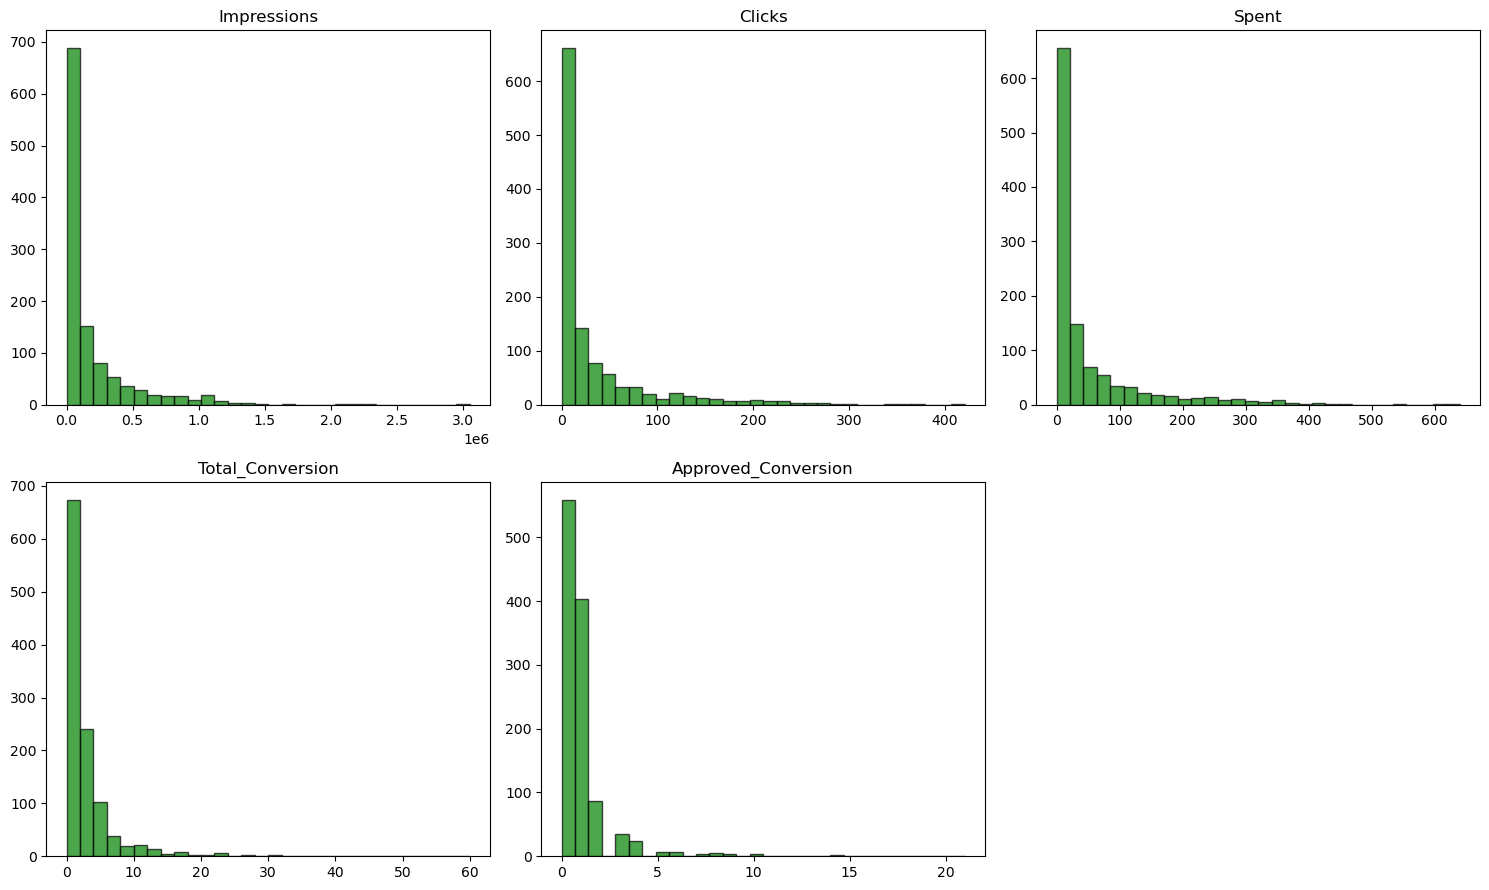

In [18]:
col_val = math.ceil((len(numerical)/2))
fig, axes = plt.subplots(2, col_val, figsize=(15, 9)) 
axes[1, 2].remove() 
axes = axes.flatten()
for i, (column_name, column_data) in enumerate(df[numerical].items()):
    axes[i].hist(column_data, bins=30, alpha=0.7, color='green', edgecolor='black')
    axes[i].set_title(column_name)

plt.tight_layout() 
plt.show()

### Histogram plots for age, gender, and interest

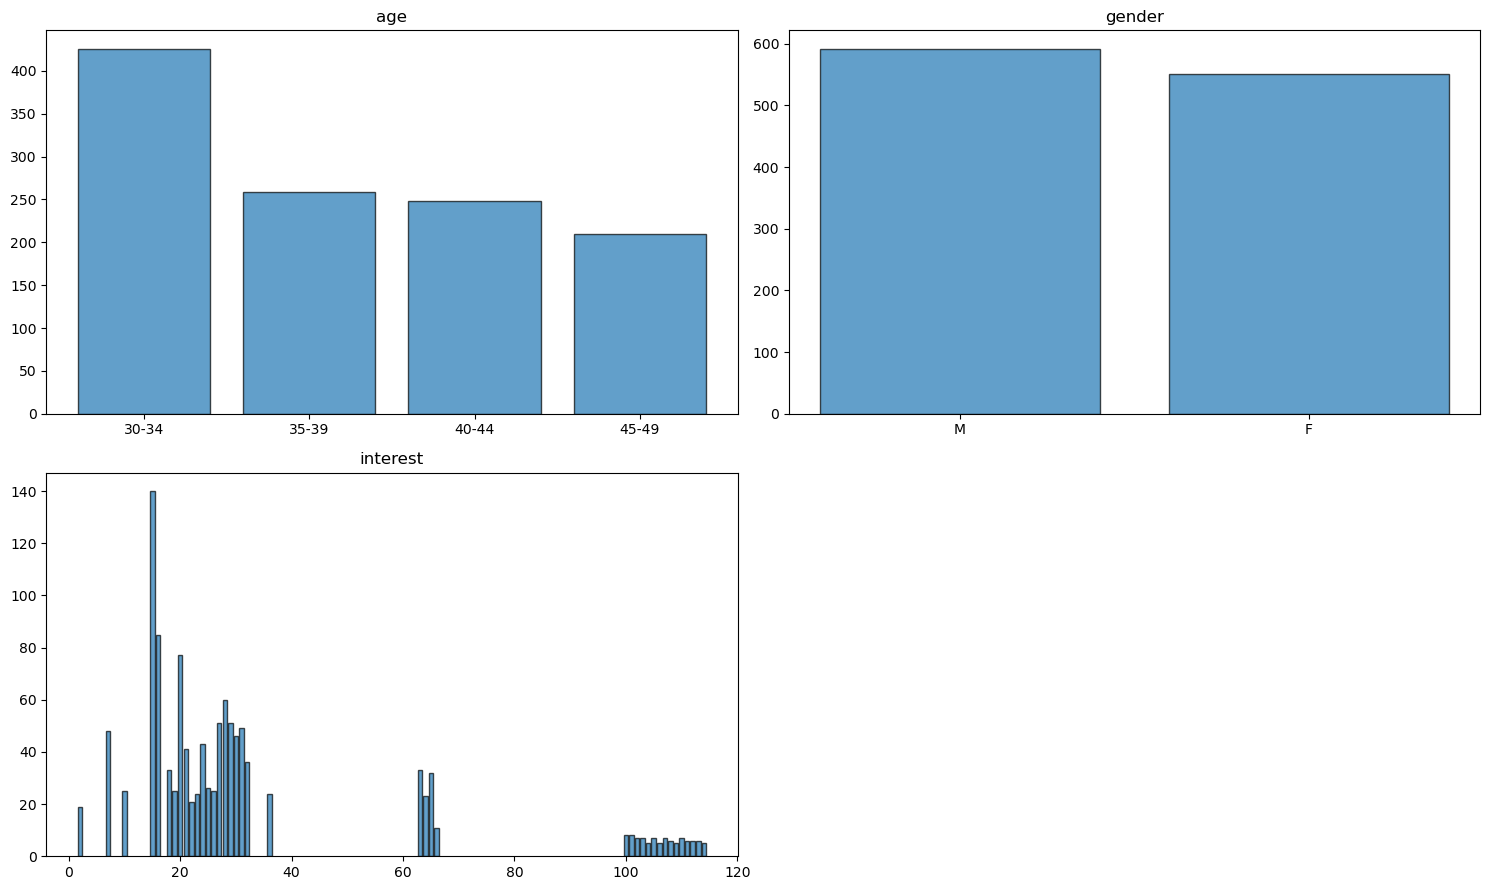

In [19]:
col_val = math.ceil((len(categorical)/2)) 
fig, axes = plt.subplots(2, col_val, figsize=(15, 9))
axes[1, 1].remove() 
axes = axes.flatten() 

for i, (column_name, column_data) in enumerate(df[categorical].items()):
    axes[i].bar(column_data.unique(), column_data.value_counts(), alpha=0.7, edgecolor='black')
    axes[i].set_title(column_name) 

plt.tight_layout() 
plt.show()


### Correlation plot

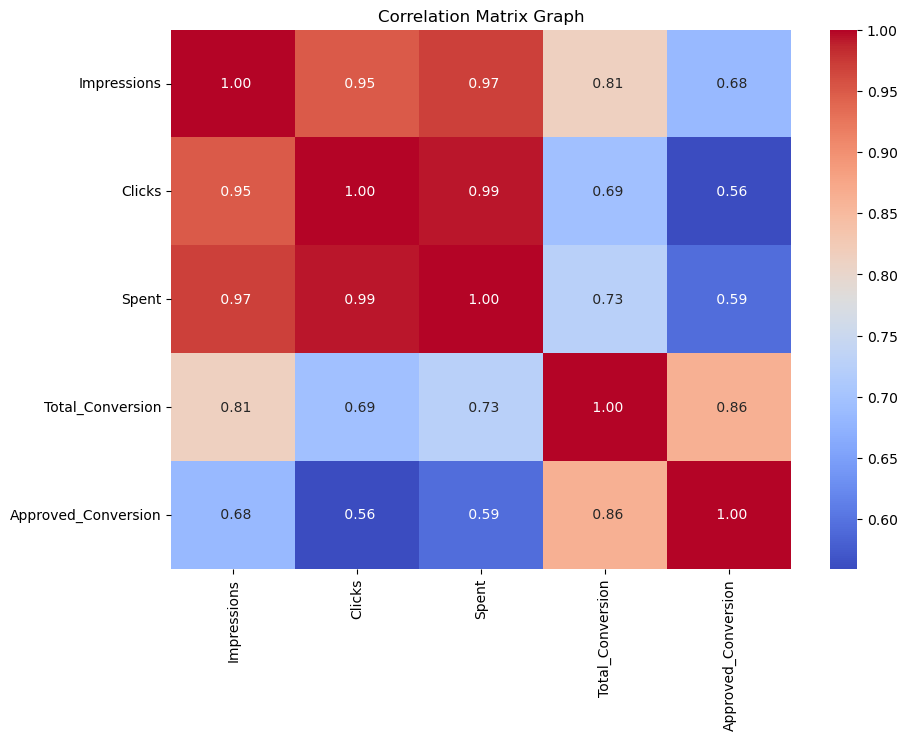

In [20]:
cols = ['Impressions','Clicks', 'Spent', 'Total_Conversion', 'Approved_Conversion']
corr_matrix = df[cols].corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix, cmap='coolwarm', fmt=' .2f', annot=True)
plt.title('Correlation Matrix Graph')
plt.show()


### Approved conversion by Age and Gender
#### Violin plot 
<p align="center"
     Definition: Conversion Rates in their simplist form can be defined as actions intitiated by the user beyond merely clicking on an add. This could inlcude
     but is not limited to things such as completeing a questionnaire, requesting additional information etc. Conversion rates can be used as an index of interest -level.
 </p>

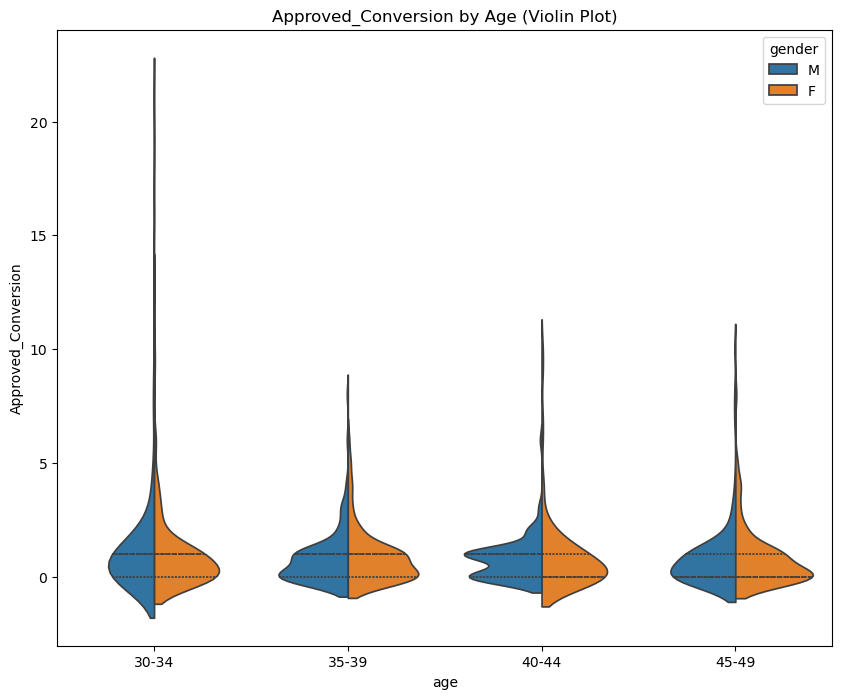

In [21]:
plt.figure(figsize=(10, 8))
sns.violinplot(data=df, x='age', y='Approved_Conversion',hue='gender', split=True, inner='quartiles')
plt.title('Approved_Conversion by Age (Violin Plot)')
plt.show()

### Generate suitable features for ML (Feature Creation, Transformation, Normalization, Extraction, Selection)

#### As we are using viewer interaction as an indicator of interest, and therefore as a potential area to focus marketing and sales resources,
#### the quantification of click-throughs Click Through Rate (CTR) is an obvious feature to define for analysis purposes.


In [22]:
df['CTR'] = df['Clicks'] / df['Impressions'] * 100


### Resources allocated (Costs) per conversion will also be a potential area of interest

In [23]:
df['Cost_per_Conversion'] = df['Spent'] / df['Approved_Conversion']

#### Creating the Conversion Rate feature for analysis

In [24]:
df['Conversion_Rate'] = df['Approved_Conversion'] / df['Total_Conversion'] * 100

In [25]:
print(df.head())

    ad_id  xyz_campaign_id  fb_campaign_id    age gender  interest  \
0  708746              916          103916  30-34      M        15   
1  708749              916          103917  30-34      M        16   
2  708771              916          103920  30-34      M        20   
3  708815              916          103928  30-34      M        28   
4  708818              916          103928  30-34      M        28   

   Impressions  Clicks  Spent  Total_Conversion  Approved_Conversion  \
0         7350       1   1.43                 2                    1   
1        17861       2   1.82                 2                    0   
2          693       0   0.00                 1                    0   
3         4259       1   1.25                 1                    0   
4         4133       1   1.29                 1                    1   

        CTR  Cost_per_Conversion  Conversion_Rate  
0  0.013605                 1.43             50.0  
1  0.011198                  inf          

### Prepping the Data for ML (Check for Nulls, NaN, Infinite Values)

In [26]:
missing_values = df.isnull().sum()
print(missing_values)
print()

inf_values = df.drop(columns=categorical).apply(lambda x: np.isinf(x).sum())
print(inf_values)

df.replace([np.inf, -np.inf], np.nan, inplace=True)


ad_id                    0
xyz_campaign_id          0
fb_campaign_id           0
age                      0
gender                   0
interest                 0
Impressions              0
Clicks                   0
Spent                    0
Total_Conversion         0
Approved_Conversion      0
CTR                      0
Cost_per_Conversion    136
Conversion_Rate          8
dtype: int64

ad_id                    0
xyz_campaign_id          0
fb_campaign_id           0
Impressions              0
Clicks                   0
Spent                    0
Total_Conversion         0
Approved_Conversion      0
CTR                      0
Cost_per_Conversion    423
Conversion_Rate          0
dtype: int64


### Handling Missing Data (Imputation)

In [27]:
encoder = OrdinalEncoder() 
cat_cols = df[categorical] 
df[categorical] = encoder.fit_transform(df[categorical])

imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(df) 
imputed_df = pd.DataFrame(imputed_data, columns=df.columns) 

imputed_df[categorical] = encoder.inverse_transform(imputed_df[categorical]) 

print(imputed_df.head())


      ad_id  xyz_campaign_id  fb_campaign_id    age gender interest  \
0  708746.0            916.0        103916.0  30-34      M       15   
1  708749.0            916.0        103917.0  30-34      M       16   
2  708771.0            916.0        103920.0  30-34      M       20   
3  708815.0            916.0        103928.0  30-34      M       28   
4  708818.0            916.0        103928.0  30-34      M       28   

   Impressions  Clicks  Spent  Total_Conversion  Approved_Conversion  \
0       7350.0     1.0   1.43               2.0                  1.0   
1      17861.0     2.0   1.82               2.0                  0.0   
2        693.0     0.0   0.00               1.0                  0.0   
3       4259.0     1.0   1.25               1.0                  0.0   
4       4133.0     1.0   1.29               1.0                  1.0   

        CTR  Cost_per_Conversion  Conversion_Rate  
0  0.013605                1.430             50.0  
1  0.011198                7.174    

### Handling Outliers in the Dataset (Winsorizing)

In [28]:
# Define function that winsorizes numerica columns
def winsorize_z_scores_v2(wins_df, columns, threshold):
    for column in columns:

      mean = wins_df[column].mean()
      std = wins_df[column].std()

      upper_bound = mean + (std * threshold)
      lower_bound = mean - (std * threshold)

      wins_df[column] = np.where(wins_df[column] > upper_bound, upper_bound, wins_df[column])
      wins_df[column] = np.where(wins_df[column] < lower_bound, lower_bound, wins_df[column])

    return wins_df

# Winsorizing numeric columns with a Z-score threshold of 3
df_winsorized = winsorize_z_scores_v2(imputed_df.copy(), numerical, 3)

# Calculate Z-scores for columns in imputed dataframe
z_scores = (imputed_df[numerical] - imputed_df[numerical].mean()) / imputed_df[numerical].std()

# Display entries having z_scores > 3
print(f"Entries with z-scores over 3: \n{z_scores[z_scores > 3].dropna()}\n")

# Calculate Z-scores for all columns in winsorized dataframe compared to the imputed dataframe
z_scores2 = (df_winsorized[numerical] - imputed_df[numerical].mean()) / imputed_df[numerical].std()

# Display entries with z_scores > 3
print(f"Entries in winsorized df with z-scores from imputed df over 3: \n{z_scores2[z_scores2 > 3].dropna()}")

     


Entries with z-scores over 3: 
     Impressions    Clicks     Spent  Total_Conversion  Approved_Conversion
525     9.161181  5.389289  6.772524         12.745214             9.239753
574     3.854545  3.033967  3.534633          6.277188             3.485046
807     3.853381  3.947973  4.274377          3.154692             5.211458
860     6.511484  6.813028  6.454373          7.838435             6.937870
867     4.855171  4.598323  4.350779          4.492904             5.211458

Entries in winsorized df with z-scores from imputed df over 3: 
Empty DataFrame
Columns: [Impressions, Clicks, Spent, Total_Conversion, Approved_Conversion]
Index: []


### Confirmation of Data Types

In [29]:
df_winsorized.dtypes

ad_id                  float64
xyz_campaign_id        float64
fb_campaign_id         float64
age                     object
gender                  object
interest                object
Impressions            float64
Clicks                 float64
Spent                  float64
Total_Conversion       float64
Approved_Conversion    float64
CTR                    float64
Cost_per_Conversion    float64
Conversion_Rate        float64
dtype: object

### Null Hypothesis:
<p align="center">
    Expecting NOT to see a great difference in the CTR for different segments of the dataset (based on Age segmentation)
    Alternative Hypothesis: 
    Their *will* be statistical significance in the different mean CTR's for the different Age groups in the dataset.
</p>

### Preprocessing the Data (Splitting the Data Sets into Two Groups A and B )

#### The groups will be split into subsets of age groups in 5 year ranges

In [30]:
A_group = df_winsorized[df_winsorized['age'].isin(['30-34', '35-39'])] 
B_group = df_winsorized[df_winsorized['age'].isin(['40-44', '45-49'])]  


#### The defined Groups A and B are the spilt further into the defined 4 age ranges

In [31]:
group_1 = df_winsorized[df_winsorized['age'] == '30-34']
group_2 = df_winsorized[df_winsorized['age'] == '35-39']
group_3 = df_winsorized[df_winsorized['age'] == '40-44']
group_4 = df_winsorized[df_winsorized['age'] == '45-49']

## Statistical Testing and Choice of Test

<p align="center">
     Because we are going to compare two population distributions that are continuous, at least one choice for testing that should
    lend itself well to our purpose is The Mann-Whiney U Test.  
</p>
<p align="center">
        The test will be looking for differences in the rank sums for the two groups.
</p>
<p align="center">
    For the test, we will first need to calculate the sample sizes of the two Groups we created  and calculate the Rank-Biserial Correlation
</p>

### Setting up the Mann-Whitney U Test parameters to compare the CTR's for the two test groups 

In [32]:
u_stat, p_value_u = mannwhitneyu(A_group['CTR'],B_group['CTR'], alternative='two-sided')

In [33]:
print("U statistic:", u_stat) 
print("P value:", p_value_u)

U statistic: 90436.0
P value: 4.634899794567663e-35


### Level of Significance Determination

In [34]:
alpha = 0.05

## Test Results 

In [35]:
MW_y = [] 
MW_y.append(A_group['CTR'].mean()) 
MW_y.append(B_group['CTR'].mean()) 

### Visualization for differences in the group means 

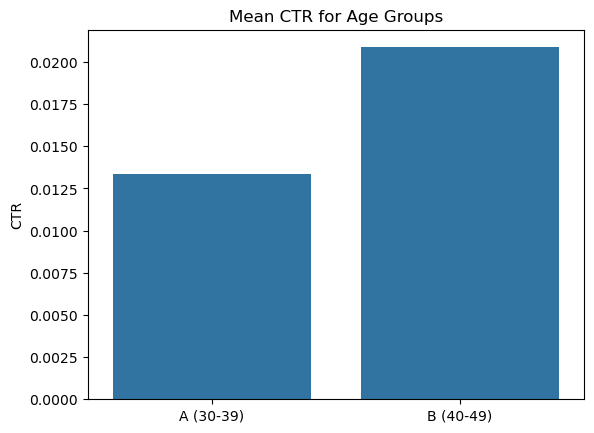

In [36]:
MW_x = ['A (30-39)', 'B (40-49)'] 
sns.barplot(x = MW_x, y = MW_y) 
plt.title('Mean CTR for Age Groups') 
plt.ylabel('CTR') 
plt.show()

### Results from Mann-Whitney U Test

In [37]:
print("Mann-Whitney U Test:") 
print("P-value:", p_value_u) 
if p_value_u < alpha:
    print("Reject Null Hypothesis: A significant difference in the CTR's between Groups A and B is demonstrated.") 
else:
    print("Null Hypothesis is not rejected: NO signigicant difference in the CTR's between Groups A and B was observed,")

Mann-Whitney U Test:
P-value: 4.634899794567663e-35
Reject Null Hypothesis: A significant difference in the CTR's between Groups A and B is demonstrated.


### Calculate Effect Test U - Size

### Kruskall-Wallis H Test

### Comparing the Conversion rates for the four age groups using **Kruskall-Wallis H Test**

<p align="center">
    The Kruskall-Wallis H test can be used for comparing k population distributions. 
    This test will be applied to all the 4 age subsets defined earlier:
</p>

In [38]:
h_stat, p_value_k = kruskal(group_1['CTR'], group_2['CTR'], group_3['CTR'], group_4['CTR']) 
print("H-Statistic:", h_stat) 
print("P-Value:", p_value_k)

H-Statistic: 185.9782254115025
P-Value: 4.511585863626081e-40


### Creating Lists for the Four Age Group Means for the Kruskall-Wallis H Test
### Plotting the results for differences in the Group Means

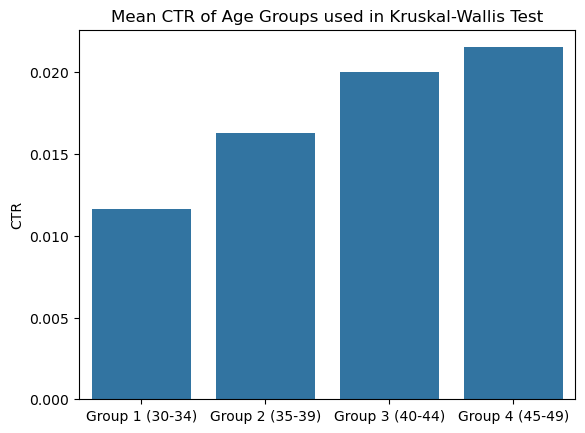


Kruskal Wallis H Test:
P-value: 4.511585863626081e-40
Reject the Null hypothesis: There is a significant difference in CTRs between the four age groups.


In [43]:
KW_y = []

KW_y.append(group_1['CTR'].mean())
KW_y.append(group_2['CTR'].mean())
KW_y.append(group_3['CTR'].mean())
KW_y.append(group_4['CTR'].mean())


KW_x = ['Group 1 (30-34)', 'Group 2 (35-39)','Group 3 (40-44)','Group 4 (45-49)']
sns.barplot(x = KW_x, y = KW_y)
plt.title('Mean CTR of Age Groups used in Kruskal-Wallis Test')
plt.ylabel('CTR')
plt.show()


print("\nKruskal Wallis H Test:")
print("P-value:", p_value_k)
if p_value_k < alpha:
    print("Reject the Null hypothesis: There is a significant difference in CTRs between the four age groups.")
else:
    print("Null hypothesis is NOT rejected: There is no significant difference in CTRs between the four age groups.")

### Calculating Effect Size for the Tests

### Mann-Whitney U Test Effect Size

In [40]:
n1 = len(A_group) 
n2 = len(B_group) 

rank_biserial_corr = 1 - (2 * u_stat) / (n1 * n2) 
print("Rank biserial correlation:", rank_biserial_corr)

Rank biserial correlation: 0.42781218958197564


### Kruskal-Wallis H Test Effect Size

In [41]:
N = len(df_winsorized)                      # total number of observations 
k = 4                                       # number of groups
eta_squared = (h_stat - k + 1) / (N - k)    # Eta ^2 
print("Eta - Squared:", eta_squared)        

Eta - Squared: 0.16064813468964223


## Findings and Recommendations

### Mann-Whitney Test Results:

<p align="center">
    The stated goal was to determine if any differences in the CTRs between two age groups in the dataset would be observed. 
    A notable and statistically significant (p-value of 0.05 for the Mann-Whitney U test) difference was observed between Age Groups A and B.
</p>
<p align="center">    
    Group A: Ages 30 - 39, Group B: 40 - 49
</p>
<p align="center">
    The calculated size effect rank-biserial correlation yielded a value of 0.43 ( a rank of medium on the Cohen classification ) *
 
#### The two age groups were ages 30 -39 (Group A) and 40 -49 (Group B). 
#### The means for the two groups were 


*(Cohen, J. (1988). Statistical power analysis for the behavioral sciences (2nd ed). Hillsdale, N.J: L. Erlbaum Associates)*

Cohen Classifications: 
<ul>
    <li>Negligible:  0<0.125</li>  
    <li>Small:       0.125 < 0.304</li>
    <li>Medium:      0.304<0.465</li>
    <li>Large: greater than or equal to:   0.465</li>
</ul>

### Kruskal-Wallis Test Results:


<p align="center">
    A difference in CTRs between the four defined age groups was found.
</p>
<p align="center">
    A statistically significant (p-value 0f 0.05) was also found between the groups in this test.
</p>
<p align="center">
        The Eta - sqaured result for the effect size yielded a result of 0.16, which ranks as a large effect.
</p>
    

### Next Steps and Recommendations:
#### Although far from exhaustive, this initial test indicates that, for example, concentrating resources on the Group B age segment
#### would be worth investigating further, or even as basis for trial-run on a new initiative, with messaging focussed on that demographic.
#### Follow up conversion rate analysis could help fine-tune such efforts.